# Car Sales Dataset

In [1]:
import pandas as pd

https://anomaly.io/seasonal-trend-decomposition-in-r/index.html

trend: pas de tendance le niveau reste constant, s'il y a tendance la valeur évolue de façon monotone (en moyenne ça ne fait que monter ou que descendre par exemple). Tendance sous-jacente des mesures. Un site Web de plus en plus populaire devrait montrer une tendance générale à la hausse.

Aléatoire: Aussi appelé «bruit», «irrégulier» ou «résiduel», il s'agit des résidus de la série chronologique d'origine après suppression des séries saisonnières et de tendance.

saisonnalité: modèles qui se répètent avec une période de temps fixe. Par exemple, un site Web peut recevoir plus de visites le week-end; cela produirait des données avec une saisonnalité de 7 jours.

In [2]:
data = pd.read_csv('./monthly_car_sales.csv')
data

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
%matplotlib inline
data.plot(x='Month',y='Sales',color='red')
plt.show()

The seasonal variation looks constant; it doesn’t change when the time series value increases. We should use the additive model.

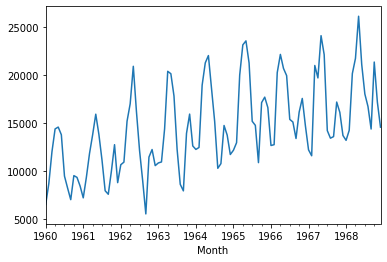

In [10]:
from pandas import datetime

def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = pd.read_csv('monthly_car_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.plot()
plt.show()

https://machinelearningmastery.com/time-series-trends-in-python/

# Detrend by Differencing

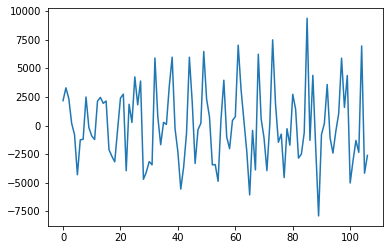

In [11]:
X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

# Detrend by Model Fitting

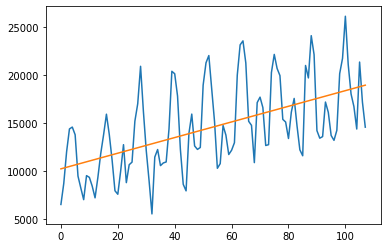

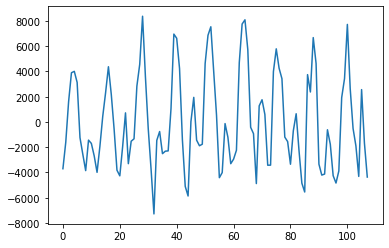

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
# fit linear model
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)
plt.show()

# Deseasonality

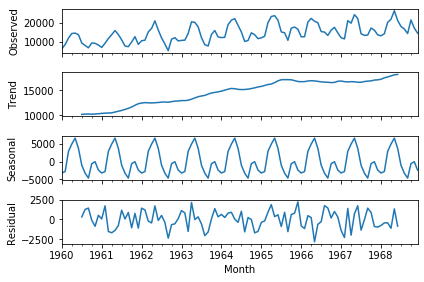

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

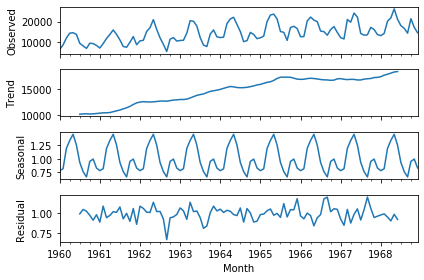

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()